In [2]:
import pandas as pd
import re
import nltk
from nltk.tokenize import word_tokenize

data import

In [5]:
data = pd.read_csv('reviews.csv') 

In [6]:
data['content']

0        I have the same recurring tasks to do every da...
1        Instead of shopping around, I downloaded Any.d...
2        Why does every once in a while... out of the b...
3        Terrible Update! This app used to be perfect f...
4        This app is deceivingly terrible. There are so...
                               ...                        
16782                                        Excellent app
16783    I love it. Easy to use. Make my life organize....
16784    I love how I could make plans and check the ap...
16785                             Exactly what I needed!!!
16786                                          Very good 👍
Name: content, Length: 16787, dtype: object

In [7]:
# Set the maximum number of columns to display in a DataFrame
pd.set_option('display.max_columns', None)

# Set the maximum number of rows to display in a DataFrame
pd.set_option('display.max_rows', None)

# Set the display format for floating-point numbers in a DataFrame
pd.set_option('display.float_format', '{:.2f}'.format)

In [12]:
# Convert the text in the 'content' column of the DataFrame to lowercase
data['content'] = data['content'].str.lower()
data['content']

0        i have the same recurring tasks to do every da...
1        instead of shopping around, i downloaded any.d...
2        why does every once in a while... out of the b...
3        terrible update! this app used to be perfect f...
4        this app is deceivingly terrible. there are so...
5        smart grocery list from hell. while it might b...
6        wunderlist was everything i needed and i had n...
7        i have had this app for almost a year. i was r...
8        almost perfect but the developers choose to ig...
9        very annoyed that i have to keep signing in an...
10       no longer usable.awful have used this free app...
11       love the interface, love the concept. but it l...
12       product images show the month view at the top ...
13       what an awful ui. when creating a new reminder...
14       this app used to be great when paired with ale...
15       i really do like this app, but i have horrible...
16       this app was great until the latest update and.

In [13]:
# Print the column names of the DataFrame
print(df.columns)

Index(['reviewId', 'userName', 'userImage', 'content', 'thumbsUpCount',
       'reviewCreatedVersion', 'at', 'replyContent', 'repliedAt', 'appVersion',
       'sortOrder', 'appId'],
      dtype='object')


Data cleaning

In [14]:
from nltk.tokenize import word_tokenize

def clean_text(text):
    if pd.isna(text):
        return []
    
    # Tokenize the text and filter out non-alphabetic tokens
    tokens = [token.lower() for token in word_tokenize(text) if token.isalpha()]
    return tokens

In [15]:
data['cleaned_reviews'] = data['content'].apply(clean_text)

In [16]:
lexicon = {'positive': 1, 'negative': -1, 'neutral': 0}

In [17]:
def analyze_sentiment(words):
    return sum(lexicon.get(word, 0) for word in words) 

data['sentiment_score'] = data['cleaned_reviews'].apply(analyze_sentiment)

In [19]:
data['review_sentiment'] = data['sentiment_score'].apply(lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral')
sentiment_counts = data['review_sentiment'].value_counts()

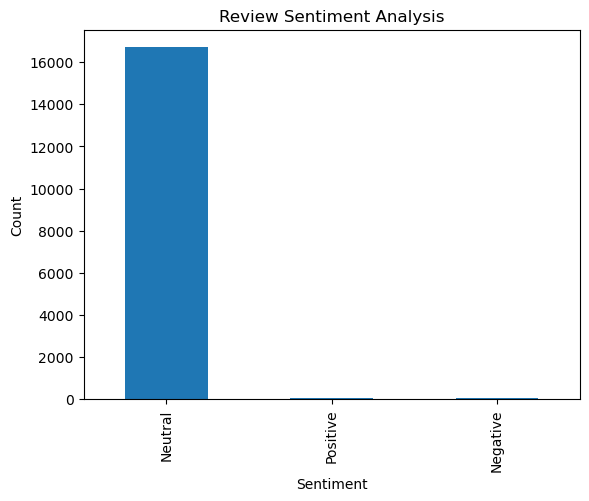

In [22]:
import matplotlib.pyplot as plt

sentiment_counts.plot(kind='bar')
plt.title('Review Sentiment Analysis')
plt.ylabel('Count')
plt.xlabel('Sentiment')
plt.show()

In [25]:
data.head(3)

,reviewId,userName,userImage,content,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId,cleaned_reviews,sentiment_score,review_sentiment
0,0197c118-5c6f-4a7b-894c-970023d1a350,Mar Zur,https://play-lh.googleusercontent.com/a/ACg8oc...,i have the same recurring tasks to do every da...,11,4.16.6.2,22-07-2020 13:13,Our team will be happy to look into it for you...,23-07-2020 16:32,4.16.6.2,most_relevant,com.anydo,"[i, have, the, same, recurring, tasks, to, do,...",0,Neutral
1,94868fb5-a21d-4ef9-ab85-81b2ed3d0785,Devin Rivera,https://play-lh.googleusercontent.com/a-/ALV-U...,"instead of shopping around, i downloaded any.d...",8,NaN,08-12-2020 06:24,We are not aware of any issues with randomized...,10-12-2020 09:38,NaN,most_relevant,com.anydo,"[instead, of, shopping, around, i, downloaded,...",0,Neutral
2,825da34e-f65d-4ef3-991d-02d5291820d6,Heidi Kinsley,https://play-lh.googleusercontent.com/a/ACg8oc...,why does every once in a while... out of the b...,6,5.11.1.2,09-07-2021 13:51,Sorry to hear that! It sounds like you might h...,11-07-2021 11:16,5.11.1.2,most_relevant,com.anydo,"[why, does, every, once, in, a, while, out, of...",0,Neutral


In [26]:
pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.3/168.3 kB 3.2 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


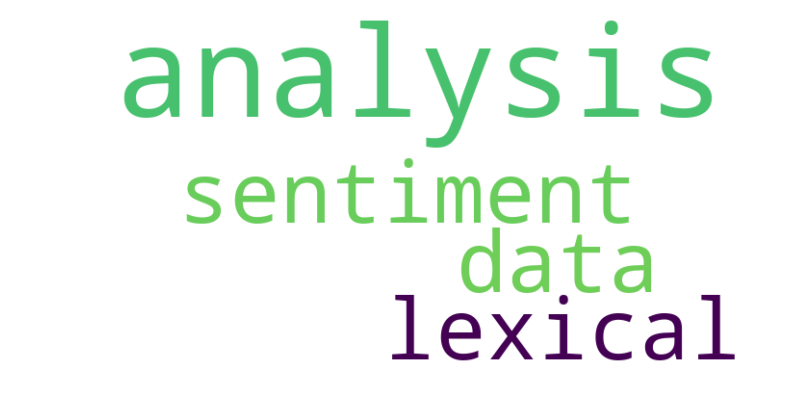

In [29]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Sample text data
text = "sentiment analysis, data analysis, lexical analysis"

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

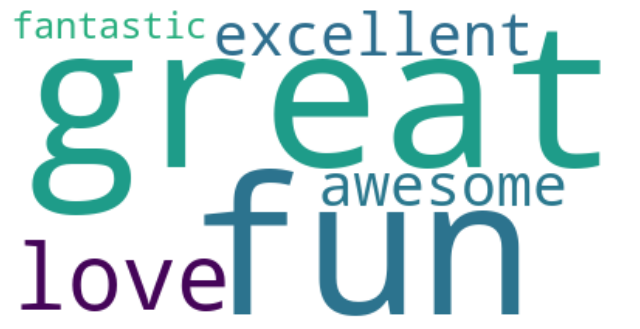

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

# Example text (positive words only)
positive_text = 'great fun love excellent awesome fantastic'

# Tokenize the text
tokens = word_tokenize(positive_text)

# Remove punctuation and convert to lowercase
tokens = [word.lower() for word in tokens if word.isalnum()]

# Remove stopwords
stop_words = set(stopwords.words('english'))
tokens = [word for word in tokens if word not in stop_words]

# Join the words back into a string
text = ' '.join(tokens)

# Create a word cloud
wordcloud = WordCloud(background_color="white").generate(text)

# Display the cloud
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

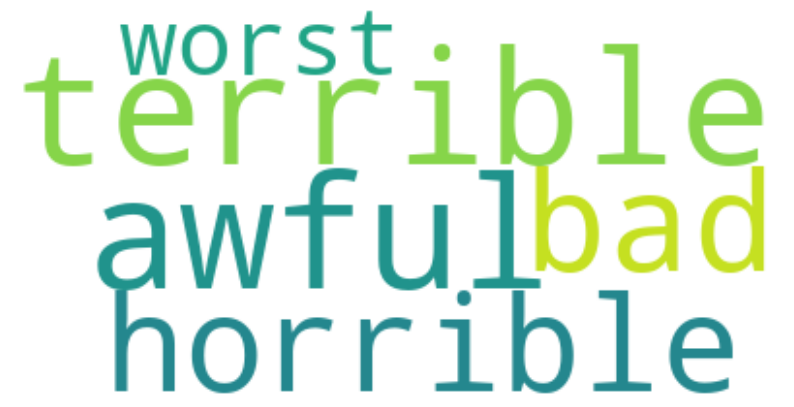

In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

# Example text (negative words only)
negative_text = 'terrible awful bad horrible worst'

# Tokenize the text
tokens = word_tokenize(negative_text)

# Remove punctuation and convert to lowercase
tokens = [word.lower() for word in tokens if word.isalnum()]

# Remove stopwords
stop_words = set(stopwords.words('english'))
tokens = [word for word in tokens if word not in stop_words]

# Join the words back into a string
text = ' '.join(tokens)

# Create a word cloud
wordcloud = WordCloud(background_color="white").generate(text)

# Display the cloud
plt.figure(figsize=(10, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()